### End to end workflow for credit card fraud detection. 
This notebook consists of different modules
* 1) Input transactional data set (You can input any time series data)
* 2) Exploratory data analysis (EDA)module 
* 3) Fraud detection using different ML classification algorithms & comparing their performance
* 4) Time series analysis of data

In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
import pycaret
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

## Module 1: Input data

In [2]:
data_path="/Users/ulainqu2/Desktop/Credit Card/"
data=pd.read_csv(data_path+'creditcard.csv')
df=data

## Set time stamp to pandas datetime index dataframe

In [3]:
import os, time
os.environ['TZ'] = 'Europe/London'
time.tzset()
time.strftime('%X %x %Z')


'10:20:35 04/21/22 BST'

In [21]:
### Transformation of time stamps in the data. Conversion of seconds into day-month-year hr-min-sec format
df['timestamp']=df['Time'].astype('int')
from datetime import datetime

timestamp = df['timestamp']


datetime = []

for t in timestamp:{
    datetime.append(time.strftime('%d-%m-%y %H:%M:%S', time.localtime(t)))
  
}
    



df['date']=datetime
df['datetime']=datetime
df['date']=df['date'].astype("datetime64")
df = df.set_index("date")
#df.index=df.datetime
#df.index.rename('date', inplace=True)

 ## Module 2: Exploratory Data Analysis and Visualisations 

### 2a- Descriptive statistics of data

In [5]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('The minimum transactional amount is  {}'.format(min(data.Amount)), attrs = ['bold']))
print(cl('The maximum transactional amount is  {}'.format(max(data.Amount)), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17
The minimum transactional amount is  0.0
The maximum transactional amount is  25691.16


  Feature 'Time' contains the seconds elapsed between each transaction
  and the first transaction in the dataset

## 2b- Visualisation of Time

<AxesSubplot:title={'center':'Distribution of Transaction time'}, ylabel='Frequency'>

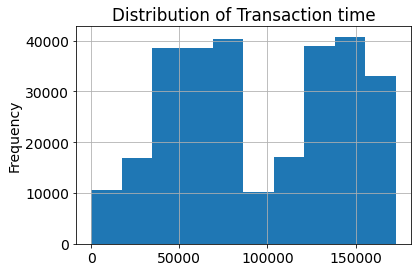

In [6]:
df.Time.plot.hist(title="Distribution of Transaction time")

In [7]:
df.Time.describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

## 2c- Visualisation of Transaction Amount

<AxesSubplot:>

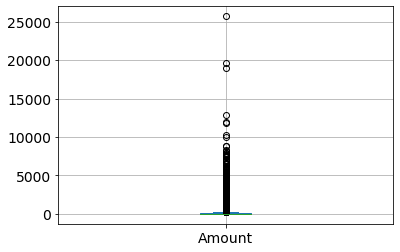

In [12]:
df.Amount.plot.box()

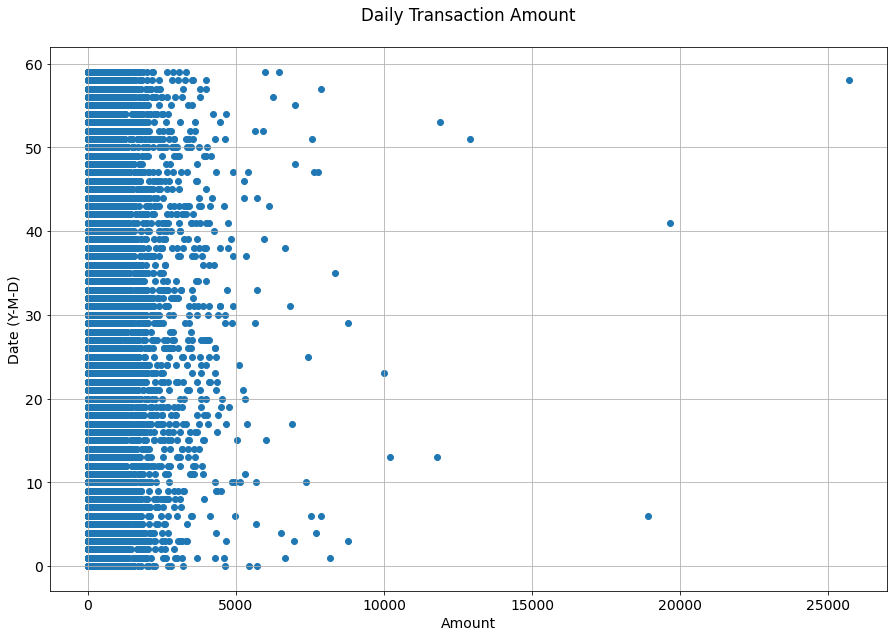

In [9]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 10))

# Add x-axis and y-axis
ax.scatter(df['Amount'], df.index.second)

# Set title and labels for axes
ax.set(xlabel="Amount",
       ylabel="Date (Y-M-D)",
       title="Daily Transaction Amount\n")

plt.show()

In [23]:
df2=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class', 'datetime']]

In [24]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,datetime
date,,,,,,,,,,,,,,,,,,,,,
2070-01-01 01:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,01-01-70 01:00:00
2070-01-01 01:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,01-01-70 01:00:00
2070-01-01 01:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,01-01-70 01:00:01
2070-01-01 01:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,01-01-70 01:00:01
2070-01-01 01:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,01-01-70 01:00:02


In [25]:
df2['date'] = pd.to_datetime(df2['datetime'])

In [26]:
df2.set_index('date', inplace=True)

## 2d- Visualisation of Average Transaction amount per hour

In [27]:
df_hour=df2.resample("H").mean()

In [28]:
 df_hour.dropna(inplace=True)

<AxesSubplot:title={'center':'Average Transaction Amount per Hour'}, xlabel='Time', ylabel='Avergae Amount'>

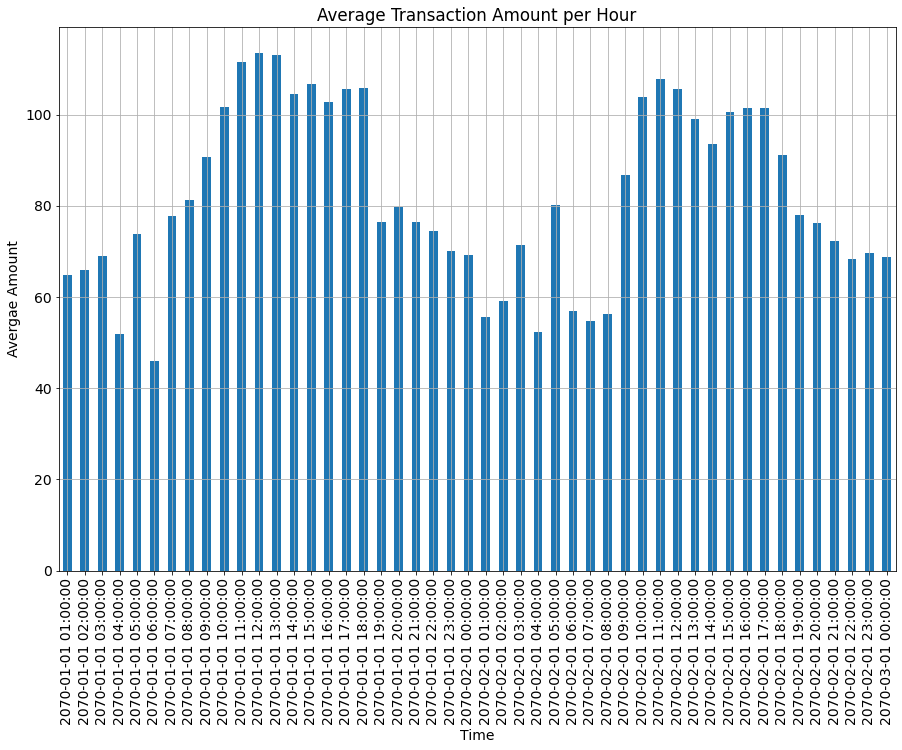

In [29]:
df_hour.Amount.plot(kind='bar', figsize=(15,10), xlabel='Time', ylabel='Avergae Amount', title='Average Transaction Amount per Hour')

Text(0.5, 1.0, 'Average transaction amount per 60 minutes')

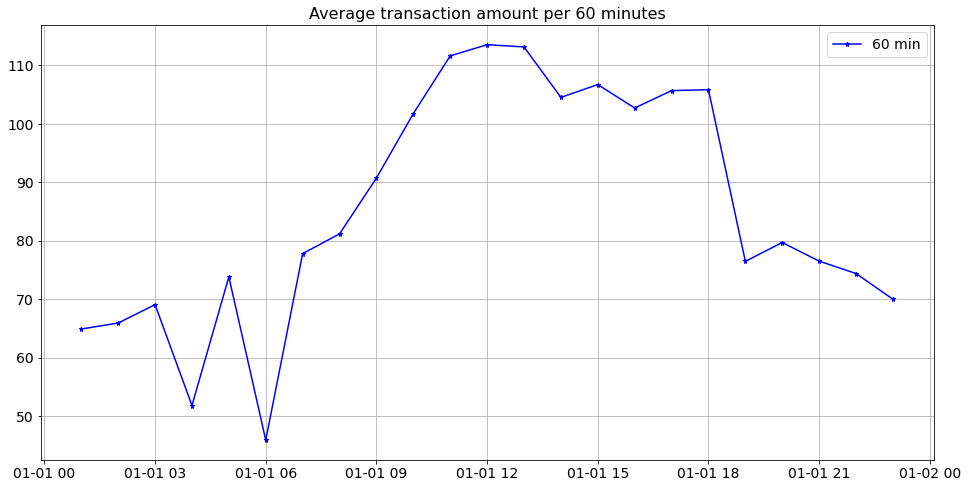

In [30]:
start, end = '2070-01-01 00:00:00', '2070-01-01 23:00:00'
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df_hour.loc[start:end, 'Amount'], marker='*', markersize=5, linestyle='-', label='60 min', color='blue')
ax.legend()
ax.set_title("Average transaction amount per 60 minutes", fontdict={'fontsize': 16, 'fontweight': 'medium'})

## 2e- Visualisation of Average Transaction amount per half hour (30min)

In [31]:
df_30min=df2.resample("30min").mean()

Text(0.5, 1.0, 'Average transaction amount per 30 minutes')

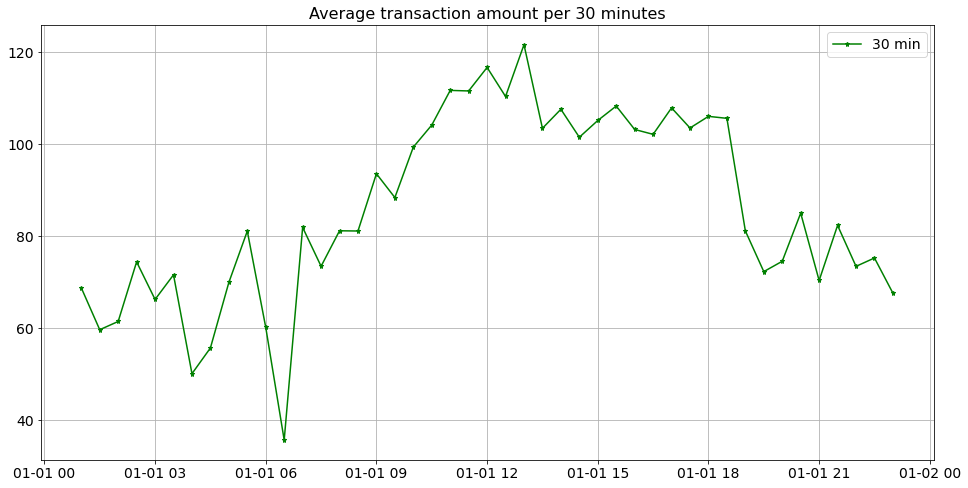

In [32]:
start, end = '2070-01-01 00:00:00', '2070-01-01 23:00:00'
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df_30min.loc[start:end, 'Amount'], marker='*', markersize=5, linestyle='-', label='30 min', color='green')
ax.legend()
ax.set_title("Average transaction amount per 30 minutes", fontdict={'fontsize': 16, 'fontweight': 'medium'})

## 2f- Visualisation of Average Transaction amount per 15 min

In [33]:
df_15min=df2.resample("15min").mean()

Text(0.5, 1.0, 'Average transaction amount per 15 minutes')

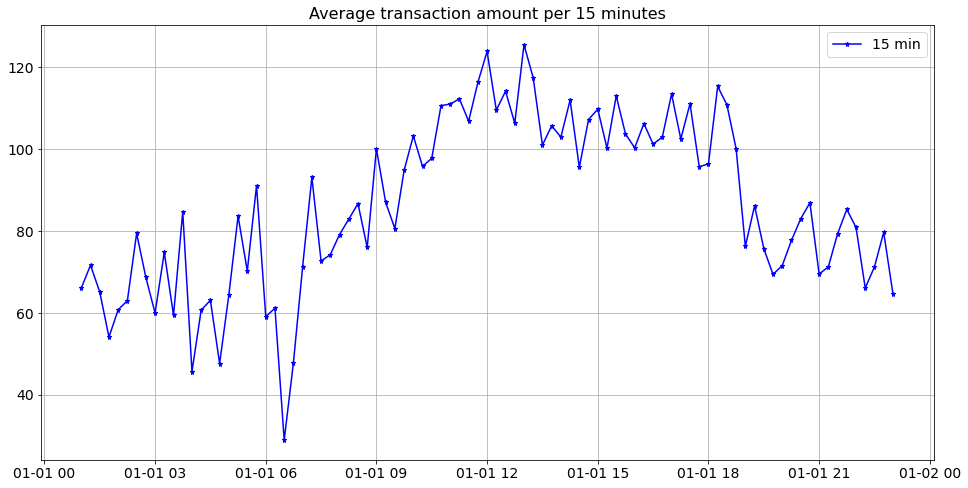

In [34]:
start, end = '2070-01-01 00:00:00', '2070-01-01 23:00:00'
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df_15min.loc[start:end, 'Amount'], marker='*', markersize=5, linestyle='-', label='15 min', color='blue')
ax.legend()
ax.set_title("Average transaction amount per 15 minutes", fontdict={'fontsize': 16, 'fontweight': 'medium'})

In [36]:
df_min=df2.resample("min").mean()

Text(0.5, 1.0, 'Average transaction amount per minutes')

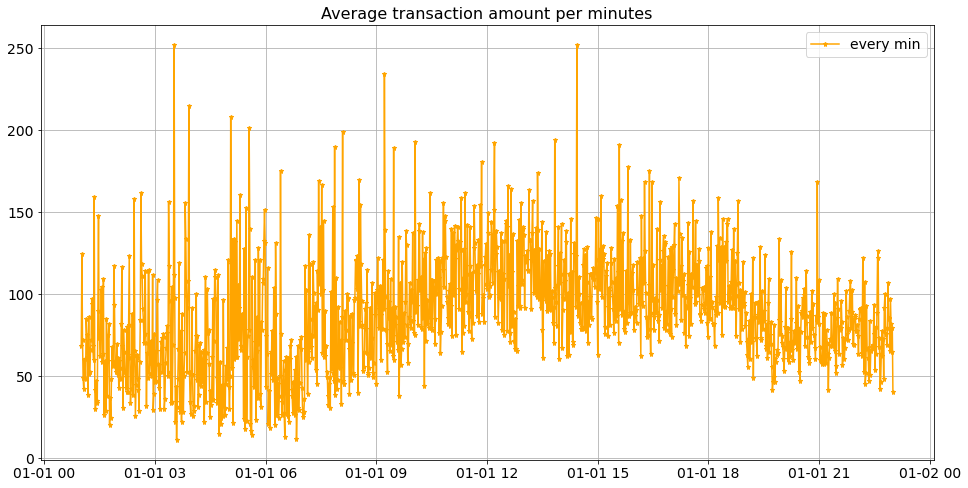

In [37]:
start, end = '2070-01-01 00:00:00', '2070-01-01 23:00:00'
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df_min.loc[start:end, 'Amount'], marker='*', markersize=5, linestyle='-', label='every min', color='orange')
ax.legend()
ax.set_title("Average transaction amount per minutes", fontdict={'fontsize': 16, 'fontweight': 'medium'})

## 2g- Visualisation of overall Credit card transaction amount across 24 hours

Text(0.5, 1.0, 'Credit card transaction amount across 24 hours ')

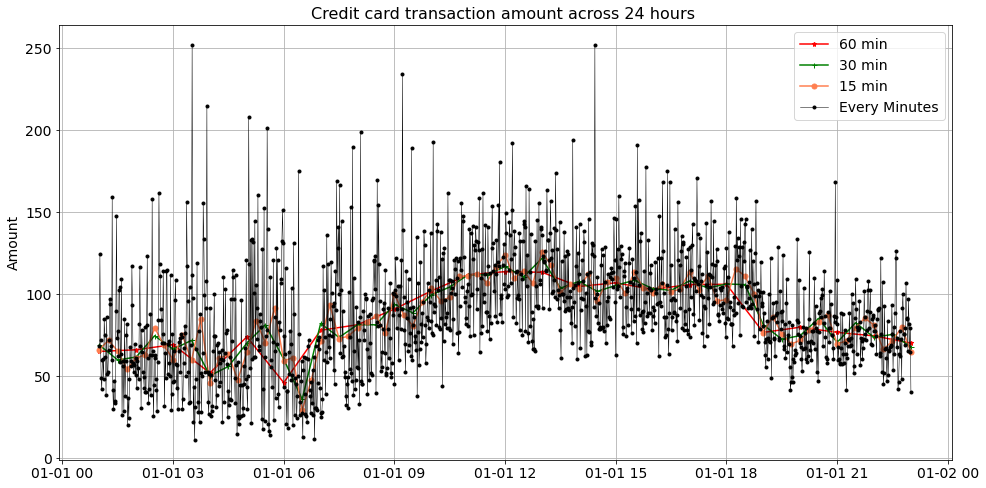

In [38]:
start, end = '2070-01-01 00:00:00', '2070-01-01 23:00:00'
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df_hour.loc[start:end, 'Amount'], marker='*', markersize=5, linestyle='-', label='60 min', color='red')
ax.plot(df_30min.loc[start:end, 'Amount'], marker='+', markersize=5, linestyle='-', label='30 min', color='green')
ax.plot(df_15min.loc[start:end, 'Amount'], marker='o', markersize=5, linestyle='-', label='15 min', color='coral')
ax.plot(df_min.loc[start:end, 'Amount'], marker='.', linestyle='-', linewidth = 0.5, label='Every Minutes', color='black')
#ax.plot(df2.loc[start:end, 'Amount'], marker=',', linestyle='-', linewidth = 0.5, label='Second', color='cyan')
#label='Monthly', color='violet')
ax.set_ylabel("Amount")
ax.legend()
ax.set_title('Credit card transaction amount across 24 hours ', fontdict={'fontsize': 16, 'fontweight': 'medium'})

## 2h- Plotting pca


In [39]:
df2['Fraud']=None
df2['Fraud'][df2['Class']==0]="no fraud"
df2['Fraud'][df2['Class']==1]="fraud"

In [40]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,datetime,Fraud
date,,,,,,,,,,,,,,,,,,,,,
2070-01-01 01:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,01-01-70 01:00:00,no fraud
2070-01-01 01:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,01-01-70 01:00:00,no fraud
2070-01-01 01:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,01-01-70 01:00:01,no fraud
2070-01-01 01:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,01-01-70 01:00:01,no fraud
2070-01-01 01:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,01-01-70 01:00:02,no fraud


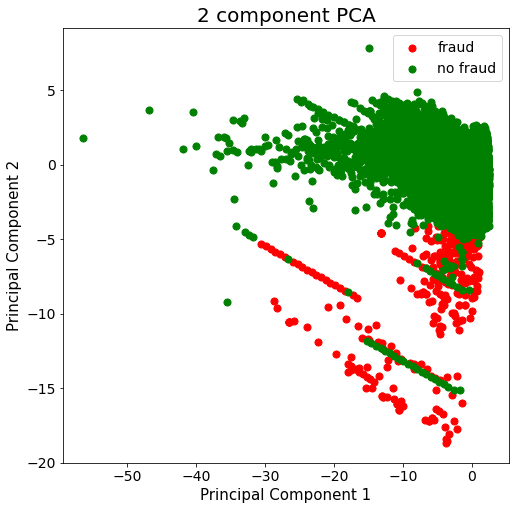

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['fraud', 'no fraud']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df2['Fraud'] == target
    ax.scatter(df2.loc[indicesToKeep, 'V1']
               , df2.loc[indicesToKeep, 'V12']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Module 3. Fraud detection using ML classification algorithms

## 3a-Normalization of target values

In [182]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [183]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,timestamp,datetime,date
date,,,,,,,,,,,,,,,,,,,,,
01-01-70 01:00:00,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0,0,01-01-70 01:00:00,2070-01-01 01:00:00
01-01-70 01:00:00,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0,0,01-01-70 01:00:00,2070-01-01 01:00:00
01-01-70 01:00:01,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0,1,01-01-70 01:00:01,2070-01-01 01:00:01
01-01-70 01:00:01,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0,1,01-01-70 01:00:01,2070-01-01 01:00:01
01-01-70 01:00:02,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0,2,01-01-70 01:00:02,2070-01-01 01:00:02


In [184]:
data.drop([ 'timestamp', 'datetime', 'date'], axis=1, inplace=True) # Dropping time variable for this analysis

## 3b- Train and Test Split

In [185]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
date,,,,,,,,,,,,,,,,,,,,,
01-01-70 01:00:00,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
01-01-70 01:00:00,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
01-01-70 01:00:01,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
01-01-70 01:00:01,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
01-01-70 01:00:02,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [186]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

In [187]:
X.shape

(284807, 30)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [189]:
print ("size of training data", X_train.shape[0])
print ("size of test data", X_test.shape[0])

size of training data 213605
size of test data 71202


In [190]:
eval_df={'Classification Algorithm':[], "accuracy":[], "f1":[]}

## 3c- Classification Algorithms

### Decision Trees

In [191]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

In [192]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9993960843796522


In [193]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_yhat)))

F1 score of the Decision Tree model is 0.7922705314009663


In [194]:
confusion_matrix(y_test, dt_yhat, labels = [0, 1])

array([[71077,    14],
       [   29,    82]])

In [195]:
eval_df['Classification Algorithm'].append("Decision Trees")
eval_df['accuracy'].append(accuracy_score(y_test, dt_yhat))
eval_df['f1'].append(f1_score(y_test, dt_yhat))

## K Nearest Neighbour

In [196]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [197]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.9985253223224066


In [198]:
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

F1 score of the K-Nearest Neighbors model is 0.10256410256410257


In [199]:
eval_df['Classification Algorithm'].append("KNN")
eval_df['accuracy'].append(accuracy_score(y_test, knn_yhat))
eval_df['f1'].append(f1_score(y_test, knn_yhat))

## Logistic Regression

In [200]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [201]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9990871042948232


In [202]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))


F1 score of the Logistic Regression model is 0.6859903381642513


In [203]:
eval_df['Classification Algorithm'].append("Logistic regression")
eval_df['accuracy'].append(accuracy_score(y_test, lr_yhat))
eval_df['f1'].append(f1_score(y_test, lr_yhat))

## Support Vector Machines

In [204]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [205]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_yhat)))

Accuracy score of the Support Vector Machines model is 0.9984410550265442


In [206]:
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))

F1 score of the Support Vector Machines model is 0.0


In [207]:
eval_df['Classification Algorithm'].append("SVM")
eval_df['accuracy'].append(accuracy_score(y_test, svm_yhat))
eval_df['f1'].append(f1_score(y_test, svm_yhat))

## Random Forest

In [208]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [209]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9992977725344794


In [210]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))


F1 score of the Random Forest model is 0.7422680412371134


In [211]:
eval_df['Classification Algorithm'].append("Random Forest")
eval_df['accuracy'].append(accuracy_score(y_test, rf_yhat))
eval_df['f1'].append(f1_score(y_test, rf_yhat))

## XGBoost Classifier

In [212]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [213]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9995786635206876


In [214]:
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))

F1 score of the XGBoost model is 0.8484848484848485


In [217]:
eval_df['Classification Algorithm'].append("XGBoost Classifier")
eval_df['accuracy'].append(accuracy_score(y_test, xgb_yhat))
eval_df['f1'].append(f1_score(y_test, xgb_yhat))

## 3d- Comparison of Classification models

In [218]:
eval_data=pd.DataFrame(eval_df)

In [219]:
eval_data

,Classification Algorithm,accuracy,f1
0,Decision Trees,0.999396,0.792271
1,KNN,0.998525,0.102564
2,Logistic regression,0.999087,0.685990
3,SVM,0.998441,0.000000
4,Random Forest,0.999298,0.742268
5,XGBoost Classifier,0.999579,0.848485


<AxesSubplot:title={'center':'Performance metrics of ML classification algorithms'}, xlabel='Classification Algorithm'>

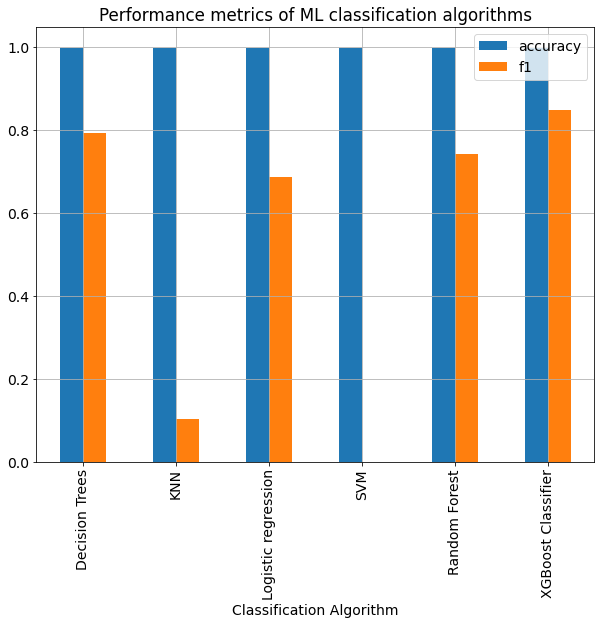

In [220]:

eval_data.plot.bar(y=['accuracy', 'f1'], x='Classification Algorithm', rot=90, 
                   title="Performance metrics of ML classification algorithms", figsize=(10,8))

# Module 4. Time series analysis


## 4a- Time series analysis using statistical methods
to test if the time series is stationary 
* 1) KPSS (Kwiatkowski–Phillips–Schmidt–Shin) test
* 2) ADF (Augmented Dickey-Fuller) test

#### Seasonal decomposition method:
It is a technique that splits a time series into several components, each representing an underlying pattern category, trend, seasonality, and noise

In [221]:
import logging
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, find_peaks_cwt

logging.disable(logging.WARNING)
warnings.filterwarnings('ignore')


def adf_test(time_series):
    dftest = adfuller(time_series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=[
        'Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value

    if dfoutput['p-value'] < 0.01:
        return True, dfoutput
    else:
        return False, dfoutput


def kpss_test(time_series):
    kpsstest = kpss(time_series, regression='c')
    dfoutput = pd.Series(kpsstest[0:3], index=[
        'Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpsstest[3].items():
        dfoutput['Critical Value (%s)' % key] = value

    if dfoutput['p-value'] < 0.01:
        return False, dfoutput
    else:
        return True, dfoutput


def most_frequent(list):
    counter = 0
    num = list[0]

    for i in list:
        curr_frequency = list.count(i)
        if curr_frequency > counter:
            counter = curr_frequency
            num = i
    return num


def identify_cont_disc(df):
    """
    :param df: the metric data column(s) that has no NAN or constant values
    :return: list of continuous metrics and their corresponding data column(s)
    """
    raw_feature_list = df.columns
    raw_feature_list = list(raw_feature_list.values)

    # feature_list = df.columns
    discrete_features = []
    continuous_features = []
    for colum in raw_feature_list:
        if len(df[colum].unique()) < 20:
            # print(colum, ': ', df[colum].unique())
            discrete_features.append(colum)
        else:
            # print(colum, ": continuous features")
            continuous_features.append(colum)
    df_cont = df[continuous_features].copy()

    df_disc = df[discrete_features].copy()

    return continuous_features, discrete_features


def analysisPeriod(df_raw, feature, time_feature, plot=False, verbose=False):
    """
    :param df_raw: data set
    :param feature: metric name
    :param time_feature: time series name
    :param plot: visual analysis functionality
    :param verbose: print details on the console
    :return: stationary, seasonal, period, decomposed series
    """

    ## INITIALIZATION: time series should be normalised into [0, 1]

    seasonal = False
    stationary = False
    df_ts = df_raw.copy()

    # Stationary Check
    # ADF TEST: Augmented Dickey–Fuller test
    # KPSS TEST: Kwiatkowski–Phillips–Schmidt–Shin TEST
    adf_result, adf_output = adf_test(df_ts[feature])
    kpss_result, kpss_output = kpss_test(df_ts[feature])

    if verbose:
        print('adf-Test')
        print(adf_result)
        print(adf_output)
        print('kpss-Test')
        print(kpss_result)
        print(kpss_output)

    # This is the code to use two tests, it will return true for stationary if or(test1,test2) = True
    if adf_result == True & kpss_result == True:
        stationary = True
    elif adf_result == True & kpss_result == False:
        stationary = False
        print("Difference Stationary")
    elif adf_result == False & kpss_result == True:
        stationary = False
        print("Trend Stationary")
    else:
        stationary = False

    # First: checking flat line.
    if np.all(np.isclose(df_ts[feature].values, df_ts[feature].values[0])):
        print('Constant series')
        seasonal = False
        period = 1
        result_add = None
    else:
        # If not flat line then:
        # Seasonality Check:

        # Automatic find the period based on Time Index

        # Shift windows to find autocorrelations
        shift_ = []
        for i in np.arange(len(df_ts[feature])):
            shift_.append(df_ts[feature].autocorr(lag=i))
        shift_ = np.array(shift_)

        # if max of Autocorelation greater than 0.9, we have seasonal
        if max(shift_) >= 0.9:
            seasonal = True

        # find peaks of autocorelation -> in order to find local maxima
        # peaks, _ = find_peaks(shift_, height=0.5)
        peaks = find_peaks_cwt(shift_, np.arange(1, 10))

        # turn peaks into differences between peaks
        diff = []
        for i in np.arange(len(peaks) - 1):
            diff.append(peaks[i + 1] - peaks[i])

        if len(diff) == 0:  # can't find peaks
            first_period = 1  # need to check again this!
        else:
            # return the most distance between peaks -> that is period of data
            first_period = most_frequent(list(diff))

        if verbose:
            #print('Candidate periods:', set(diff))
            for eachdiff in diff:
                print(df_ts[feature].autocorr(lag=eachdiff), end='\t')
            print()

        if (plot == True) & (verbose == True):
            plt.figure(figsize=(20, 3))
            sm.graphics.tsa.plot_acf(
                df_ts[feature].squeeze(), lags=int(first_period))

        # if period is too large
        if first_period > int(len(df_ts) / 2):
            if verbose:
                print('Frequency for Moving Average is over half size!')
            first_period = int(len(df_ts) / 2)

        # SEASONAL ANALYSIS

        if verbose:
            print('First period:', first_period)

        df_ts.index = pd.to_datetime(
            df_ts[time_feature], format='%Y-%m-%d %H:%M:%S')
        rolling_mean = df_ts[feature].rolling(
            window=int(first_period)).mean()
        exp1 = pd.Series(df_ts[feature].ewm(
            span=int(first_period), adjust=False).mean())
        exp1.index = pd.to_datetime(
            df_ts[time_feature], format='%Y-%m-%d %H:%M:%S')
           

        if (verbose == True) & (plot == True):
            df_ori = df_ts[[feature, time_feature]].copy()
            df_ori.set_index(time_feature, inplace=True)

            fig, ax = plt.subplots(figsize=(15, 4))

            df_ori.plot(ax=ax)
            exp1.plot(ax=ax)

            ax.legend(
                ['Original Series', 'Moving Average Series with P=%d' % first_period])

            plt.show()

        # Using Moving Average
        result_add = seasonal_decompose(
            exp1, model='additive', extrapolate_trend='freq', freq=first_period)

        # Using STL
        #         from statsmodels.tsa.seasonal import STL
        #         stl = STL(exp1, period=first_period, robust=True)
        #         result_add = stl.fit()

        # Only check the seasonal series to find again the best period
        arr_seasonal_ = pd.Series(result_add.seasonal + result_add.resid)

        # if seasonal is flat
        if np.all(np.isclose(arr_seasonal_, arr_seasonal_[0])):
            if verbose == True:
                print('Seasonal + Residual become flat')
            seasonal = False
            period = 1
        else:
            # if seasonal is not flat

            # Continue to use autocorrelation to find the period
            shift_ = []
            for i in np.arange(len(arr_seasonal_)):
                shift_.append(arr_seasonal_.autocorr(lag=i))

            shift_ = np.array(shift_)

            # Find peaks again for seasonal + residual
            peaks, _ = find_peaks(shift_, height=0.85, distance=7)
            #             peaks = find_peaks_cwt(shift_,np.arange(1,10))

            # Looking for possible periods
            if len(peaks) < 2:
                if df_ts[feature].autocorr(lag=first_period) > 0.80:
                    period = first_period
                    seasonal = True
                else:
                    period = 1
                    seasonal = False
                    result_add = None
            # result_add = seasonal_decompose(df_ts[feature], model='additive', extrapolate_trend='freq',freq=period)
            else:
                diff = []
                for i in np.arange(len(peaks)):
                    if i + 1 < len(peaks):
                        diff.append(peaks[i + 1] - peaks[i])

                if verbose:
                    print('Candidate periods:', set(diff))
                    for eachdiff in diff:
                        print(df_ts[feature].autocorr(lag=eachdiff), end='\t')
                    print()

                if verbose:
                    print('Peaks of autocorr:', diff)
                if 2 * most_frequent(list(diff)) > len(df_ts):
                    seasonal = False
                    period = 1
                    result_add = None
                else:
                    seasonal = True
                    period = most_frequent(list(diff))

            if (plot == True) & (verbose == True):
                sm.graphics.tsa.plot_acf(exp1.squeeze(), lags=int(period) * 2)
                plt.show()

            # Final Decomposition

            result_add = seasonal_decompose(
                df_ts[feature], model='additive', extrapolate_trend='freq', freq=period)

            # plot results of decomposition
            if plot:
                plt.rcParams.update({'figure.figsize': (10, 10)})
                result_add.plot()
                plt.show()

                plt.figure(figsize=(20, 3))
                plt.plot(df_ts[feature].values, label="Timeseries")
                plt.axvline(x=0, color='r', ls='--')
                plt.axvline(x=period, color='r', ls='--')
                plt.grid(True)
                plt.axis('tight')
                plt.legend(loc="best", fontsize=13)
                plt.show()

    continuous, discrete = identify_cont_disc(df_raw[[feature]])

    return stationary, seasonal, period, result_add, continuous, discrete

In [222]:
df['date']=df.index

In [223]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,timestamp,datetime,date
date,,,,,,,,,,,,,,,,,,,,,
2070-01-01 01:00:00,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,01-01-70 01:00:00,2070-01-01 01:00:00
2070-01-01 01:00:00,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,01-01-70 01:00:00,2070-01-01 01:00:00
2070-01-01 01:00:01,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1,01-01-70 01:00:01,2070-01-01 01:00:01
2070-01-01 01:00:01,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,01-01-70 01:00:01,2070-01-01 01:00:01
2070-01-01 01:00:02,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,2,01-01-70 01:00:02,2070-01-01 01:00:02


adf-Test
True
Test Statistic                    -46.148397
p-value                             0.000000
#Lags Used                         88.000000
Number of Observations Used    284718.000000
Critical Value (1%)                -3.430373
Critical Value (5%)                -2.861550
Critical Value (10%)               -2.566775
dtype: float64
kpss-Test
True
Test Statistic            8.865958
p-value                   0.010000
Lags Used                88.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


0.008658516079452108	0.006028636423725934	0.008643590501193857	0.0028293710908092375	0.0037777204705752906	0.0059294778496455	0.007580367435848958	0.00600161976759291	0.006744211355589414	0.003976622680199156	0.009760751257706169	0.004455775975858682	0.0059294778496455	0.007580367435848958	0.007130301750363099	0.0037777204705752906	0.004458445752236181	0.008157913575835181	0.009299991972391085	0.009299991972391085	0.009299991972391085	0.0059294778496455	0.004458445752236181	0.00600161976759291	0.0055988951784090735	0.005309099972308099	0.004455775975858682	0.0055988951784090735	0.004665676402869846	0.004458445752236181	0.0037777204705752906	0.005806230218088474	0.00600161976759291	0.004455775975858682	0.007580367435848958	0.007580367435848958	0.003664824446020896	0.004665676402869846	0.009137468514796796	0.006480419003024996	0.004665676402869846	0.009299991972391085	0.009299991972391085	0.004455775975858682	0.00417911193667067	0.00417911193667067	0.008643590501193857	0.0086585160794521

0.008643590501193857	0.004458445752236181	0.006028636423725934	0.008407623461242962	0.003976622680199156	0.009299991972391085	0.010322004639281847	0.004783662486232841	0.005806230218088474	0.004992363878217711	0.008208486859133255	0.004665676402869846	0.009299991972391085	0.008157913575835181	0.005842139638450169	0.009760751257706169	0.008323275963148722	0.008157913575835181	0.008157913575835181	0.0055988951784090735	0.004455775975858682	0.003368894746844457	0.004842951612034848	0.00562537929824737	0.002245209421873375	0.0059294778496455	0.00600161976759291	0.007580367435848958	0.008658516079452108	0.008956751662493682	0.008658516079452108	0.0055988951784090735	0.008157913575835181	0.00600161976759291	0.003976622680199156	0.00417911193667067	0.005309099972308099	0.005309099972308099	0.00684479070626775	0.0059294778496455	0.004992363878217711	0.006869396160728504	0.007761749182075572	0.007580367435848958	0.003976622680199156	0.008157913575835181	0.008643590501193857	0.008658516079452108

0.005309099972308099	0.008157913575835181	0.00417911193667067	0.004992363878217711	0.009299991972391085	0.0060238388026749206	0.0059294778496455	0.007580367435848958	0.007130301750363099	0.008658516079452108	0.004843863701660548	0.004992363878217711	0.007580367435848958	0.00417911193667067	0.007580367435848958	0.008157913575835181	0.009760751257706169	0.003664824446020896	0.0055988951784090735	0.004665676402869846	0.003930111420570909	0.004665676402869846	0.004992363878217711	0.004992363878217711	0.010495326820154034	0.002245209421873375	0.004841624345186917	0.0055988951784090735	0.00417911193667067	0.008658516079452108	0.0062453051668438855	0.00581130914133157	0.002003218518749409	0.005700397195859026	0.003930111420570909	0.00600161976759291	0.004665676402869846	0.003664824446020896	0.008407623461242962	0.00417911193667067	0.009299991972391085	0.008643590501193857	0.004665676402869846	0.0030609295269437395	0.008643590501193857	0.0075405063724239	0.00417911193667067	0.00580623021808847

0.0039045624879324157	0.004842951612034848	0.0062453051668438855	0.008773198838254729	0.00600161976759291	0.010495326820154034	0.00591050581490362	0.003976622680199156	0.004992363878217711	0.0055988951784090735	0.004947405990370701	0.006480419003024996	0.008956751662493682	0.008407623461242962	0.004458445752236181	0.008658516079452108	0.0039045624879324157	0.007580367435848958	0.0062453051668438855	0.0039045624879324157	0.004088367840193403	0.003976622680199156	0.0037777204705752906	0.0075405063724239	0.008407623461242962	0.004665676402869846	0.004665676402869846	0.004458445752236181	0.004992363878217711	0.008157913575835181	0.007580367435848958	0.004455775975858682	0.004458445752236181	0.004992363878217711	0.004843863701660548	0.010495326820154034	0.0059294778496455	0.008643590501193857	0.004458445752236181	0.0062453051668438855	0.008407623461242962	0.006869396160728504	0.003976622680199156	0.004458445752236181	0.004455775975858682	0.003664824446020896	0.003976622680199156	0.004992363

0.003368894746844457	0.004665676402869846	0.008658516079452108	0.009760751257706169	0.006744211355589414	0.008208486859133255	0.00600161976759291	0.00600161976759291	0.00600161976759291	0.0075405063724239	0.004458445752236181	0.003976622680199156	0.008643590501193857	0.010495326820154034	0.003976622680199156	0.004455775975858682	0.006028636423725934	0.010495326820154034	0.008407623461242962	0.008956751662493682	0.009760751257706169	0.0075405063724239	0.009760751257706169	0.006053458944649179	0.005700397195859026	1.0	0.00562537929824737	0.0030609295269437395	0.00591050581490362	0.008658516079452108	0.008643590501193857	0.003976622680199156	0.008956751662493682	0.008658516079452108	0.004665676402869846	0.005579057317853381	0.007580367435848958	0.009760751257706169	0.00600161976759291	0.003976622680199156	0.003664824446020896	0.00417911193667067	0.008658516079452108	0.00600161976759291	0.007761749182075572	0.005806230218088474	0.006028636423725934	0.005806230218088474	0.005598895178409073

0.004584919559882419	0.004992363878217711	0.005806230218088474	0.006028636423725934	0.004665676402869846	0.004458445752236181	0.002245209421873375	0.003368894746844457	0.0075405063724239	0.00600161976759291	0.008407623461242962	0.003930111420570909	0.009299991972391085	0.005806230218088474	0.009137468514796796	0.003368894746844457	0.003976622680199156	0.0060238388026749206	0.003368894746844457	0.004455775975858682	0.008208486859133255	0.008208486859133255	0.006028636423725934	0.009760751257706169	0.003976622680199156	0.009299991972391085	0.00600161976759291	0.00417911193667067	0.00417911193667067	0.004992363878217711	0.008658516079452108	0.004992363878217711	0.00600161976759291	0.007130301750363099	0.00417911193667067	0.00684479070626775	0.007130301750363099	0.008956751662493682	0.002245209421873375	0.00581130914133157	0.004455775975858682	0.009299991972391085	0.00417911193667067	0.002003218518749409	0.00684479070626775	0.00417911193667067	0.008773198838254729	0.008407623461242962	0.00

0.008157913575835181	0.006869396160728504	0.004992363878217711	0.00417911193667067	0.00417911193667067	0.008208486859133255	0.009137468514796796	0.004992363878217711	0.007634181878538334	0.008773198838254729	0.008323275963148722	0.008208486859133255	0.007634181878538334	0.0075405063724239	0.004458445752236181	0.00600161976759291	0.005806230218088474	0.00600161976759291	0.008658516079452108	0.008658516079452108	0.005806230218088474	0.006028636423725934	0.008956751662493682	0.007130301750363099	0.004458445752236181	0.0075405063724239	0.007580367435848958	0.005806230218088474	0.006028636423725934	0.00684479070626775	0.0059294778496455	0.009299991972391085	0.008157913575835181	0.009299991972391085	0.00600161976759291	0.005309099972308099	0.005309099972308099	0.008643590501193857	0.003976622680199156	0.003976622680199156	0.004455775975858682	0.00684479070626775	0.00417911193667067	0.0062453051668438855	0.004705204100061274	0.004455775975858682	0.003976622680199156	0.0075405063724239	0.00758

0.007580367435848958	0.006053458944649179	0.0060939944065068865	0.008157913575835181	0.004455775975858682	0.008643590501193857	0.007130301750363099	0.00600161976759291	0.003976622680199156	0.004841624345186917	0.008407623461242962	0.0062453051668438855	0.003664824446020896	0.0062453051668438855	0.002003218518749409	0.0039045624879324157	0.004665676402869846	0.004665676402869846	0.005309099972308099	0.004455775975858682	0.008658516079452108	0.009299991972391085	0.008658516079452108	0.0039045624879324157	0.004455775975858682	0.002003218518749409	0.008157913575835181	0.00562537929824737	0.003930111420570909	0.008407623461242962	0.009299991972391085	0.007580367435848958	0.004992363878217711	0.005309099972308099	0.00684479070626775	0.00417911193667067	0.00417911193667067	0.004665676402869846	0.004665676402869846	0.004992363878217711	0.004458445752236181	0.0039045624879324157	0.005309099972308099	0.008208486859133255	0.004455775975858682	0.004665676402869846	0.009137468514796796	0.0039301114

0.0055988951784090735	0.005700397195859026	0.003976622680199156	0.010322004639281847	0.00600161976759291	0.00581130914133157	0.004458445752236181	0.004783662486232841	0.008157913575835181	0.004841624345186917	0.008658516079452108	0.0059294778496455	0.008658516079452108	0.008208486859133255	0.00417911193667067	0.004458445752236181	0.009760751257706169	0.004455775975858682	0.008157913575835181	0.0062453051668438855	0.004455775975858682	0.0055988951784090735	0.004458445752236181	0.004665676402869846	0.003976622680199156	0.006028636423725934	0.008157913575835181	0.002245209421873375	0.008208486859133255	0.008643590501193857	0.0059294778496455	0.009137468514796796	0.008658516079452108	0.008208486859133255	0.008658516079452108	0.008773198838254729	0.009299991972391085	0.004665676402869846	0.00600161976759291	0.004665676402869846	0.008208486859133255	0.003664824446020896	0.002245209421873375	0.008208486859133255	0.004947405990370701	0.008658516079452108	0.008407623461242962	0.0075803674358489

0.003976622680199156	0.006028636423725934	0.008643590501193857	0.0075405063724239	0.0060939944065068865	0.008643590501193857	0.004458445752236181	0.002245209421873375	0.009760751257706169	0.008658516079452108	0.007634181878538334	0.007761749182075572	0.0075405063724239	0.002003218518749409	0.00417911193667067	0.003976622680199156	0.0055988951784090735	0.0055988951784090735	0.007130301750363099	0.006744211355589414	0.004992363878217711	0.008157913575835181	0.008208486859133255	0.00600161976759291	0.004455775975858682	0.009299991972391085	0.008658516079452108	0.00600161976759291	0.009760751257706169	0.004783662486232841	0.003664824446020896	0.010495326820154034	0.006028636423725934	0.008643590501193857	0.004841624345186917	0.008208486859133255	0.0039045624879324157	0.009299991972391085	0.0055988951784090735	0.003976622680199156	0.005806230218088474	0.009299991972391085	0.00581130914133157	0.009760751257706169	0.007580367435848958	0.004992363878217711	0.003976622680199156	0.00895675166249

0.008643590501193857	0.0075405063724239	0.0075405063724239	0.007634181878538334	0.003664824446020896	0.003930111420570909	0.00417911193667067	0.0075405063724239	0.004455775975858682	0.009299991972391085	0.005700397195859026	0.0059294778496455	0.006744211355589414	0.0059294778496455	0.008407623461242962	0.004665676402869846	0.004455775975858682	0.009299991972391085	0.008773198838254729	0.0060939944065068865	0.00417911193667067	0.004455775975858682	0.0062453051668438855	0.008323275963148722	0.004458445752236181	0.003976622680199156	0.00684479070626775	0.003664824446020896	0.009760751257706169	0.00562537929824737	0.006028636423725934	0.00417911193667067	0.006028636423725934	0.0039045624879324157	0.00417911193667067	0.00417911193667067	0.007580367435848958	0.004992363878217711	0.004992363878217711	0.005806230218088474	0.003664824446020896	0.005309099972308099	0.008157913575835181	0.004842951612034848	0.00562537929824737	0.008208486859133255	0.008658516079452108	0.010495326820154034	0.00686

0.008643590501193857	0.00600161976759291	0.009137468514796796	0.009760751257706169	0.00600161976759291	0.006053458944649179	0.004665676402869846	0.009299991972391085	0.006869396160728504	0.003976622680199156	0.007580367435848958	0.00600161976759291	0.004665676402869846	0.004584919559882419	0.003976622680199156	0.006028636423725934	0.008208486859133255	0.004947405990370701	0.005700397195859026	0.008323275963148722	0.007634181878538334	0.005309099972308099	0.008658516079452108	0.00684479070626775	0.0059294778496455	0.007580367435848958	0.005309099972308099	0.009137468514796796	0.004458445752236181	0.003664824446020896	0.003664824446020896	0.008208486859133255	0.00684479070626775	0.005309099972308099	0.0055988951784090735	0.004665676402869846	0.007580367435848958	0.003664824446020896	0.005579057317853381	0.006053458944649179	0.004665676402869846	0.003976622680199156	0.008157913575835181	0.003976622680199156	0.007634181878538334	0.004458445752236181	0.006028636423725934	0.00602863642372593

0.004455775975858682	0.003664824446020896	0.008208486859133255	0.003976622680199156	0.009299991972391085	0.008643590501193857	0.0075405063724239	0.0055988951784090735	0.005309099972308099	0.003976622680199156	0.003930111420570909	0.009299991972391085	0.0062453051668438855	0.008773198838254729	0.003368894746844457	0.009299991972391085	0.004455775975858682	0.009299991972391085	0.00417911193667067	0.005806230218088474	0.009137468514796796	0.007130301750363099	0.0055988951784090735	0.002003218518749409	0.00417911193667067	0.008157913575835181	0.007634181878538334	0.007580367435848958	0.0033572079695285625	0.008643590501193857	0.002245209421873375	0.0075405063724239	0.00562537929824737	0.008643590501193857	0.00684479070626775	0.0075405063724239	0.005309099972308099	0.0039045624879324157	0.00684479070626775	0.0075405063724239	0.008157913575835181	0.00591050581490362	0.008311265845248002	0.009299991972391085	0.009299991972391085	0.004584919559882419	0.007580367435848958	0.00600161976759291	0.

0.008208486859133255	0.0075405063724239	0.003664824446020896	0.007130301750363099	0.005806230218088474	0.0055988951784090735	0.008643590501193857	0.00600161976759291	0.00417911193667067	0.004455775975858682	0.009137468514796796	0.002245209421873375	0.008643590501193857	0.0055988951784090735	0.00684479070626775	0.00600161976759291	0.009299991972391085	0.004992363878217711	0.003976622680199156	0.010495326820154034	0.005806230218088474	0.0055988951784090735	0.0062453051668438855	0.008658516079452108	0.008643590501193857	0.003664824446020896	0.008643590501193857	0.0030609295269437395	0.005309099972308099	0.00600161976759291	0.008658516079452108	0.004992363878217711	0.004455775975858682	0.004841624345186917	0.006480419003024996	0.0055988951784090735	0.0059294778496455	0.0055988951784090735	0.009137468514796796	0.004458445752236181	0.009760751257706169	0.00600161976759291	0.0075405063724239	0.009137468514796796	0.0055988951784090735	0.004992363878217711	0.009299991972391085	0.008407623461242

0.009137468514796796	0.0039045624879324157	0.007580367435848958	0.005449737199111046	0.003976622680199156	0.00417911193667067	0.00417911193667067	0.004458445752236181	0.008157913575835181	0.005700397195859026	0.004992363878217711	0.005908393416104492	0.008643590501193857	0.00684479070626775	0.004455775975858682	0.004841624345186917	0.007580367435848958	0.008208486859133255	0.006053458944649179	0.007580367435848958	0.007130301750363099	0.0039045624879324157	0.004992363878217711	0.008643590501193857	0.0055988951784090735	0.004665676402869846	0.00417911193667067	0.003976622680199156	0.00600161976759291	0.005449737199111046	0.008407623461242962	0.00417911193667067	0.008643590501193857	0.00562537929824737	0.003664824446020896	0.004458445752236181	0.004665676402869846	0.009299991972391085	0.0075405063724239	0.00417911193667067	0.0075405063724239	0.003664824446020896	0.008407623461242962	0.004458445752236181	0.003976622680199156	0.003664824446020896	0.008658516079452108	0.009299991972391085	0

0.004947405990370701	0.007580367435848958	0.008157913575835181	0.0059294778496455	0.004665676402869846	0.009760751257706169	0.006480419003024996	0.006028636423725934	0.003976622680199156	0.008157913575835181	0.00684479070626775	0.008773198838254729	0.0059294778496455	0.00417911193667067	0.004458445752236181	0.0059294778496455	0.007580367435848958	0.0039045624879324157	0.0059294778496455	0.003976622680199156	0.004665676402869846	0.0055988951784090735	0.00684479070626775	0.003664824446020896	0.003976622680199156	0.00600161976759291	0.0059294778496455	0.00417911193667067	0.008643590501193857	0.00684479070626775	0.005579057317853381	0.008157913575835181	0.004992363878217711	0.008208486859133255	0.0075405063724239	0.005309099972308099	0.009170351555224521	0.009299991972391085	0.008658516079452108	0.005908393416104492	0.008157913575835181	0.009137468514796796	0.004841624345186917	0.008208486859133255	0.004842951612034848	0.004665676402869846	0.00600161976759291	0.006480419003024996	0.0060534

0.005600850983445124	0.002003218518749409	0.00684479070626775	0.004458445752236181	0.007634181878538334	0.003976622680199156	0.004665676402869846	0.008208486859133255	0.007130301750363099	0.007580367435848958	0.004455775975858682	0.0059294778496455	0.008658516079452108	0.008658516079452108	0.006053458944649179	0.0060238388026749206	0.00600161976759291	0.0039045624879324157	0.0055988951784090735	0.008643590501193857	0.0059294778496455	0.003930111420570909	0.004841624345186917	0.0067924472724228665	0.010495326820154034	0.00684479070626775	0.009299991972391085	0.0039045624879324157	0.008157913575835181	0.0055988951784090735	0.004455775975858682	0.00600161976759291	0.004455775975858682	0.00417911193667067	0.009299991972391085	0.008643590501193857	0.003976622680199156	0.009137468514796796	0.00684479070626775	0.004992363878217711	0.004841624345186917	0.0039045624879324157	0.003930111420570909	0.004455775975858682	0.008157913575835181	0.008643590501193857	0.008773198838254729	0.00592947784964

0.003368894746844457	0.008643590501193857	0.0067924472724228665	0.004841624345186917	0.00562537929824737	0.007634181878538334	0.0059294778496455	0.008658516079452108	0.0062453051668438855	0.0030609295269437395	0.003976622680199156	0.006028636423725934	0.00600161976759291	0.004455775975858682	0.0055988951784090735	0.004455775975858682	0.004665676402869846	0.00600161976759291	0.006480419003024996	0.004665676402869846	0.004458445752236181	0.005309099972308099	0.008407623461242962	0.0059294778496455	0.008643590501193857	0.004842951612034848	0.003664824446020896	0.008157913575835181	0.008643590501193857	0.002245209421873375	0.003976622680199156	0.009299991972391085	0.006028636423725934	0.0060238388026749206	0.0055988951784090735	0.008658516079452108	0.00600161976759291	0.009760751257706169	0.009137468514796796	0.006028636423725934	0.004783662486232841	0.009299991972391085	0.009760751257706169	0.00600161976759291	0.004458445752236181	0.004665676402869846	0.008658516079452108	0.01032200463928

0.006744211355589414	0.0055988951784090735	0.005449737199111046	0.0037777204705752906	0.004842951612034848	0.008643590501193857	0.007634181878538334	0.008208486859133255	0.008643590501193857	0.0059294778496455	0.006028636423725934	0.006028636423725934	0.004458445752236181	0.00417911193667067	0.00417911193667067	0.008208486859133255	0.008658516079452108	0.00600161976759291	0.006744211355589414	0.003930111420570909	0.0075405063724239	0.008208486859133255	0.005309099972308099	0.008157913575835181	0.00417911193667067	0.008658516079452108	0.008658516079452108	0.008643590501193857	0.0055988951784090735	0.008643590501193857	0.003664824446020896	0.00562537929824737	0.003930111420570909	0.006028636423725934	0.00684479070626775	0.008643590501193857	0.002245209421873375	0.006480419003024996	0.005309099972308099	0.007130301750363099	0.0055988951784090735	0.004455775975858682	0.008643590501193857	0.0059294778496455	0.003930111420570909	0.009760751257706169	0.007580367435848958	0.007634181878538334	

0.004841624345186917	0.004455775975858682	0.009760751257706169	0.006028636423725934	0.00600161976759291	0.004455775975858682	0.005806230218088474	0.0075405063724239	0.008643590501193857	0.0039045624879324157	0.009299991972391085	0.009760751257706169	0.006028636423725934	0.006028636423725934	0.006028636423725934	0.0062453051668438855	0.003368894746844457	0.005806230218088474	0.002245209421873375	0.00600161976759291	0.004455775975858682	0.005806230218088474	0.008643590501193857	0.0067924472724228665	0.008643590501193857	0.005309099972308099	0.003976622680199156	0.008658516079452108	0.008658516079452108	0.0055988951784090735	0.008208486859133255	0.004455775975858682	0.007580367435848958	0.007580367435848958	0.004947405990370701	0.008643590501193857	0.004842951612034848	0.0030589094150165297	0.003453894039784168	0.004458445752236181	0.0030609295269437395	0.0052095762371456265	0.009299991972391085	0.007130301750363099	0.007130301750363099	0.009299991972391085	0.007730119121368247	0.00417911

0.008658516079452108	0.009299991972391085	0.008773198838254729	0.007580367435848958	0.004455775975858682	0.007580367435848958	0.007580367435848958	0.009760751257706169	0.0033572079695285625	0.003930111420570909	0.007580367435848958	0.00600161976759291	0.003976622680199156	0.009137468514796796	0.0039045624879324157	0.003976622680199156	0.008157913575835181	0.003976622680199156	0.004458445752236181	0.003976622680199156	0.008643590501193857	0.002245209421873375	0.00600161976759291	0.006053458944649179	0.0037777204705752906	0.005682259063192097	0.00417911193667067	0.004455775975858682	0.007580367435848958	0.008157913575835181	0.009137468514796796	0.002245209421873375	0.008643590501193857	0.005806230218088474	0.004455775975858682	0.007580367435848958	0.0059294778496455	0.007580367435848958	0.007130301750363099	0.0059294778496455	0.005449737199111046	0.003976622680199156	0.006744211355589414	0.0075405063724239	0.0055988951784090735	0.004455775975858682	0.008407623461242962	0.0044584457522361

0.0055988951784090735	0.006480419003024996	0.004458445752236181	0.006028636423725934	0.007130301750363099	0.004842951612034848	0.004841624345186917	0.008773198838254729	0.005806230218088474	0.008643590501193857	0.003664824446020896	0.004992363878217711	0.0055988951784090735	0.010495326820154034	0.006080458891308136	0.008208486859133255	0.004455775975858682	0.003976622680199156	0.004665676402869846	0.008157913575835181	0.003976622680199156	0.004665676402869846	0.008157913575835181	0.009760751257706169	0.008407623461242962	0.009760751257706169	0.004458445752236181	0.004458445752236181	0.003664824446020896	0.006028636423725934	0.00417911193667067	0.004992363878217711	0.002003218518749409	0.006028636423725934	0.009760751257706169	0.003976622680199156	0.006869396160728504	0.005842139638450169	0.010322004639281847	0.0055988951784090735	0.004665676402869846	0.003976622680199156	0.006744211355589414	0.00562537929824737	0.0028293710908092375	0.003930111420570909	0.009299991972391085	0.007580367

0.005309099972308099	0.00591050581490362	0.00562537929824737	0.008658516079452108	0.007169064382946626	0.004992363878217711	0.008643590501193857	0.0055988951784090735	0.0075405063724239	0.006869396160728504	0.004665676402869846	0.00600161976759291	0.008407623461242962	0.010495326820154034	0.004455775975858682	0.00600161976759291	0.0020983644024550664	0.004665676402869846	0.00562537929824737	0.00417911193667067	0.00600161976759291	0.002003218518749409	0.003976622680199156	0.0039045624879324157	0.004841624345186917	0.0059294778496455	0.00600161976759291	0.004992363878217711	0.007580367435848958	0.003664824446020896	0.008658516079452108	0.008208486859133255	0.004665676402869846	0.007580367435848958	0.0062453051668438855	0.008658516079452108	0.00417911193667067	0.008323275963148722	0.003976622680199156	0.007580367435848958	0.003976622680199156	0.008643590501193857	0.00417911193667067	0.006744211355589414	0.009760751257706169	0.00600161976759291	0.008407623461242962	0.009299991972391085	0.0

0.008658516079452108	0.004455775975858682	0.009760751257706169	0.0059294778496455	0.0075405063724239	0.008658516079452108	0.0039045624879324157	0.005806230218088474	0.005736987468176409	0.004665676402869846	0.0039045624879324157	0.0075405063724239	0.010495326820154034	0.0059294778496455	0.006436731892877075	0.00562537929824737	0.006869396160728504	0.006744211355589414	0.003976622680199156	0.003976622680199156	0.008956751662493682	0.008658516079452108	0.008658516079452108	0.006053458944649179	0.009137468514796796	0.004455775975858682	0.007580367435848958	0.008658516079452108	0.00600161976759291	0.0075405063724239	0.008643590501193857	0.0075405063724239	0.00571334704485949	0.008407623461242962	0.0055988951784090735	0.004841624345186917	0.008157913575835181	0.008643590501193857	0.005806230218088474	0.00417911193667067	0.0060238388026749206	0.005309099972308099	0.00417911193667067	0.004458445752236181	0.0039045624879324157	0.006480419003024996	0.004088367840193403	0.0059294778496455	0.0039

0.0031705572639569106	0.007634181878538334	0.004455775975858682	0.002245209421873375	0.0075405063724239	0.003368894746844457	0.008157913575835181	0.007130301750363099	0.007130301750363099	0.008773198838254729	0.0075405063724239	0.003976622680199156	0.004455775975858682	0.004665676402869846	0.008208486859133255	0.007761749182075572	0.0055988951784090735	0.008643590501193857	0.00581130914133157	0.007634181878538334	0.008157913575835181	0.008157913575835181	0.008658516079452108	0.005309099972308099	0.004088367840193403	0.009299991972391085	0.003976622680199156	0.0075405063724239	0.009760751257706169	0.0039045624879324157	0.009137468514796796	0.008157913575835181	0.008643590501193857	0.004458445752236181	0.00600161976759291	0.003976622680199156	0.008643590501193857	0.006869396160728504	0.008643590501193857	0.0055988951784090735	0.004665676402869846	0.009760751257706169	0.0060238388026749206	0.006053458944649179	0.0049283395479072815	0.00417911193667067	0.007761749182075572	0.00580623021808

0.004841624345186917	0.005808773134346165	0.003930111420570909	0.003976622680199156	0.00417911193667067	0.003976622680199156	0.0039045624879324157	0.0075405063724239	0.008643590501193857	0.008658516079452108	0.00562537929824737	0.0059294778496455	0.007634181878538334	0.005062811995813352	0.0075405063724239	0.00600161976759291	0.010495326820154034	0.008643590501193857	0.008658516079452108	0.003930111420570909	0.0075405063724239	0.0055988951784090735	0.004458445752236181	0.009299991972391085	0.004455775975858682	0.009299991972391085	0.004841624345186917	0.006053458944649179	0.006080458891308136	0.005309099972308099	0.0037777204705752906	0.006028636423725934	0.005806230218088474	0.004458445752236181	0.009299991972391085	0.00562537929824737	0.008208486859133255	0.008157913575835181	0.004455775975858682	0.0039045624879324157	0.005600850983445124	0.004992363878217711	0.006744211355589414	0.0039045624879324157	0.0055988951784090735	0.009137468514796796	0.004458445752236181	0.00624530516684388

0.003969601543574562	0.005806230218088474	0.009137468514796796	0.008208486859133255	0.008407623461242962	0.006028636423725934	0.009299991972391085	0.004665676402869846	0.004841624345186917	0.00684479070626775	0.00417911193667067	0.00684479070626775	0.009760751257706169	0.008157913575835181	0.0039045624879324157	0.004458445752236181	0.006028636423725934	0.006869396160728504	0.00417911193667067	0.002245209421873375	0.004455775975858682	0.00417911193667067	0.008658516079452108	0.003976622680199156	0.00562537929824737	0.004458445752236181	0.0062453051668438855	0.008773198838254729	0.006368663058378914	0.007580367435848958	0.004455775975858682	0.0030589094150165297	0.007580367435848958	0.007634181878538334	0.003976622680199156	0.003976622680199156	0.004947405990370701	0.004665676402869846	0.00600161976759291	0.0055988951784090735	0.003976622680199156	0.0060939944065068865	0.0075405063724239	0.008658516079452108	0.009137468514796796	0.008157913575835181	0.003664824446020896	0.004665676402869

0.00571334704485949	0.008157913575835181	0.009760751257706169	0.00417911193667067	0.004665676402869846	0.009299991972391085	0.0075405063724239	0.009299991972391085	0.008643590501193857	0.007580367435848958	0.006053458944649179	0.0062453051668438855	0.0075405063724239	0.003976622680199156	0.006744211355589414	0.0055988951784090735	0.0030609295269437395	0.00417911193667067	0.004665676402869846	0.004455775975858682	0.008658516079452108	0.006053458944649179	0.004458445752236181	0.008643590501193857	0.003453894039784168	0.004455775975858682	0.00600161976759291	0.0075405063724239	0.009760751257706169	0.006869396160728504	0.002245209421873375	0.0059294778496455	0.0060939944065068865	0.002003218518749409	0.004221068811866826	0.005309099972308099	0.003976622680199156	0.008157913575835181	0.008157913575835181	0.009299991972391085	0.00417911193667067	0.003368894746844457	0.004455775975858682	0.008407623461242962	0.006744211355589414	0.004665676402869846	0.004992363878217711	0.008773198838254729	0

0.008773198838254729	0.009760751257706169	0.010322004639281847	0.0055988951784090735	0.008956751662493682	0.0059294778496455	0.00600161976759291	0.00417911193667067	0.0059294778496455	0.010322004639281847	0.003976622680199156	0.0052095762371456265	0.003976622680199156	0.008658516079452108	0.007130301750363099	0.006028636423725934	0.004665676402869846	0.004665676402869846	0.006028636423725934	0.0039045624879324157	0.003930111420570909	0.006480419003024996	0.004992363878217711	0.008658516079452108	0.003976622680199156	0.009760751257706169	0.0059294778496455	0.008658516079452108	0.00600161976759291	0.00417911193667067	0.0060238388026749206	0.0039045624879324157	0.0039045624879324157	0.004665676402869846	0.0055988951784090735	0.00600161976759291	0.003664824446020896	0.007761749182075572	0.003664824446020896	0.003368894746844457	0.004665676402869846	0.004665676402869846	0.0039045624879324157	0.0075405063724239	0.0075405063724239	0.004665676402869846	0.008157913575835181	0.008658516079452108

0.0075405063724239	0.008658516079452108	0.0075405063724239	0.0075405063724239	0.00562537929824737	0.008643590501193857	0.003453894039784168	0.0059294778496455	0.0030609295269437395	0.008643590501193857	0.005062811995813352	0.003664824446020896	0.004841624345186917	0.007580367435848958	0.003930111420570909	0.0062453051668438855	0.009299991972391085	0.003664824446020896	0.006080458891308136	0.0039045624879324157	0.0039045624879324157	0.008157913575835181	0.0059294778496455	0.0055988951784090735	0.003976622680199156	0.007580367435848958	0.004841624345186917	0.003930111420570909	0.0075405063724239	0.006053458944649179	0.004455775975858682	0.003664824446020896	0.004842951612034848	0.009299991972391085	0.004455775975858682	0.006053458944649179	0.008643590501193857	0.005309099972308099	0.009760751257706169	0.0055988951784090735	0.004458445752236181	0.0026386602468128992	0.0075405063724239	0.0055988951784090735	0.004455775975858682	0.004841624345186917	0.009137468514796796	0.006744211355589414

<Figure size 1440x216 with 0 Axes>

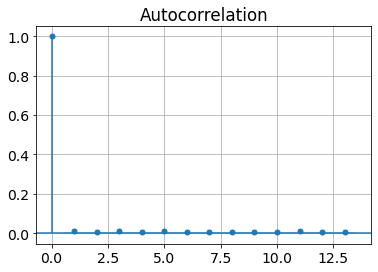

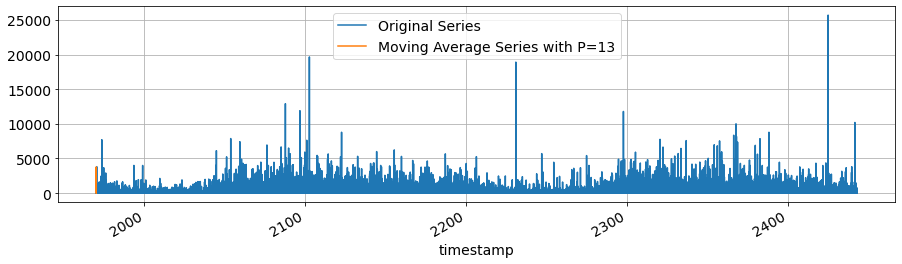

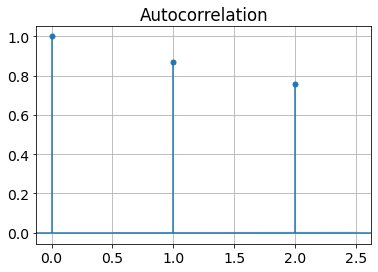

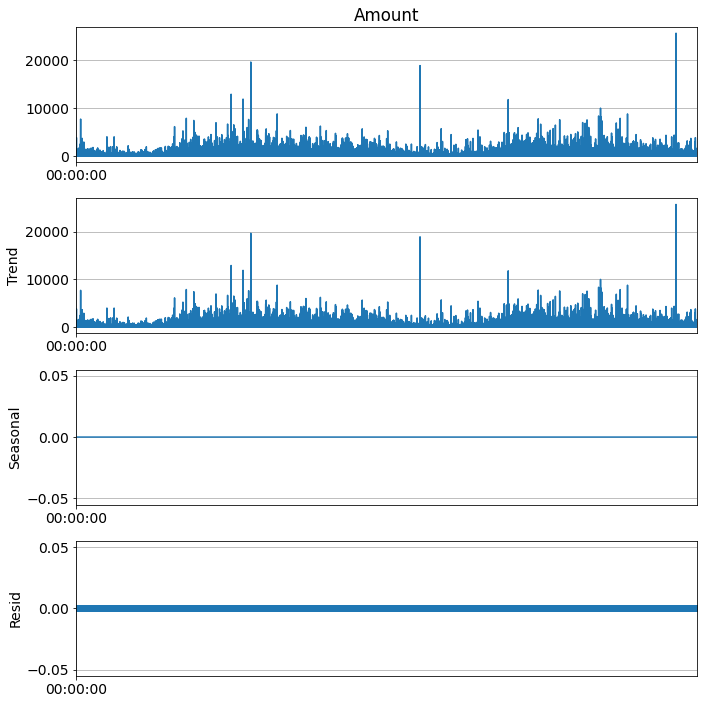

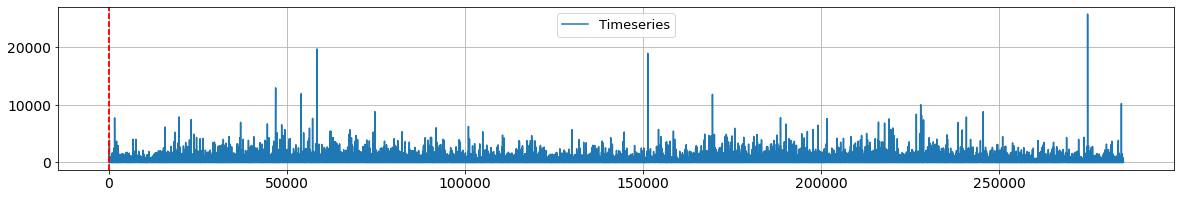

Timeseries Amount is Stationary? True 
Timeseries Amount is Seasonal? False 
Timeseries Amount is Continuous


In [224]:
feature_name = "Amount"
df["date"] = pd.to_datetime(df["date"], format='%H:%M:%S')

timestamp = df.columns[31]

stationary, seasonal, period, resultdfs, continuous, discrete = analysisPeriod(df,
                                                                               feature=feature_name,
                                                                               time_feature=timestamp,
                                                                               plot=True,
                                                                               verbose=True)

print("Timeseries %s is Stationary? %s " % (feature_name, stationary))

print("Timeseries %s is Seasonal? %s " % (feature_name, seasonal))

if seasonal and period > 1:
    print("Period for Timeseries %s =  %s " % (feature_name, period))
if seasonal and period == 1:
    print("Period for Timeseries %s is not found" % (feature_name, period))

if continuous:
    print("Timeseries %s is Continuous" % (feature_name))
else:
    print("Timeseries %s is Discrete" % (feature_name))